In [1]:
import zipfile,os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# LOAD DATA

In [2]:
local_zip = '../Data/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
valid_dir = os.path.join(base_dir,'rps-cv-images')

# SPLIT DATA

In [5]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)
test_datagen = ImageDataGenerator(
              rescale = 1./225,
              validation_split = 0.4)


In [6]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

valid_data = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (100,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# BUILD THE MODEL

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 148, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 72, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 34, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       348,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,827 (1.36 MB)

 Trainable params: 355,827 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
)

# MODEL TRAINING

In [10]:
model.fit(
    train_data,
      steps_per_epoch=25,
      epochs=20,
      validation_data=valid_data,
      validation_steps=5,
      verbose=2
)

Epoch 1/20


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 18s - 713ms/step - accuracy: 0.3225 - loss: 1.1404 - val_accuracy: 0.2750 - val_loss: 1.0985
Epoch 2/20


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 - 3s - 116ms/step - accuracy: 0.3444 - loss: 1.0969 - val_accuracy: 0.3625 - val_loss: 1.0938
Epoch 3/20
25/25 - 6s - 234ms/step - accuracy: 0.3974 - loss: 1.0797 - val_accuracy: 0.3812 - val_loss: 1.0684
Epoch 4/20
25/25 - 2s - 74ms/step - accuracy: 0.5221 - loss: 1.0044 - val_accuracy: 0.7000 - val_loss: 0.9192
Epoch 5/20
25/25 - 5s - 188ms/step - accuracy: 0.6442 - loss: 0.8398 - val_accuracy: 0.8062 - val_loss: 0.6793
Epoch 6/20
25/25 - 2s - 66ms/step - accuracy: 0.7518 - loss: 0.6444 - val_accuracy: 0.8378 - val_loss: 0.5615
Epoch 7/20
25/25 - 5s - 209ms/step - accuracy: 0.7831 - loss: 0.5529 - val_accuracy: 0.8813 - val_loss: 0.3687
Epoch 8/20
25/25 - 2s - 75ms/step - accuracy: 0.8364 - loss: 0.4393 - val_accuracy: 0.8750 - val_loss: 0.3926
Epoch 9/20
25/25 - 5s - 195ms/step - accuracy: 0.8325 - loss: 0.4104 - val_accuracy: 0.8687 - val_loss: 0.3630
Epoch 10/20
25/25 - 2s - 74ms/step - accuracy: 0.8787 - loss: 0.3231 - val_accuracy: 0.9062 - val_loss: 0.2723
Epoch 11/20
25/

# PREDICTING

In [11]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 100, 150, 3])

  predict_proba = sorted(model.predict(im_input)[0])[2]
  predict_class = np.argmax(model.predict(im_input))

  if predict_class == 0:
      predict_label = 'Paper'
  elif predict_class == 1:
      predict_label = 'Rock'
  else:
      predict_label = 'Scissor'

  print('\n')
  plt.show()
  print("\nImage prediction result: ", predict_label)
  print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

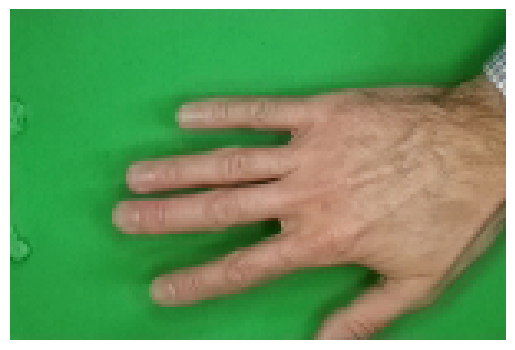

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step



Image prediction result:  Paper
Probability:  97.47 %




In [ ]:
img_path = 'Image Predict/Zx5NMbS4YBf29guF.png'
img = image.load_img(img_path, target_size=(100, 150))

plt.imshow(img)
plt.axis('off')
plt.show()

predict_image(img)